In [32]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from keras.datasets import mnist, cifar10
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
test=x_train[0].reshape(-1,3)
test.shape

(1024, 3)

In [5]:
pcaR = PCA()
C = pcaR.fit(test).transform(test)

In [6]:
kmeans = KMeans(n_clusters=32) #sqrt(n)=K
clusters= kmeans.fit_predict(test)

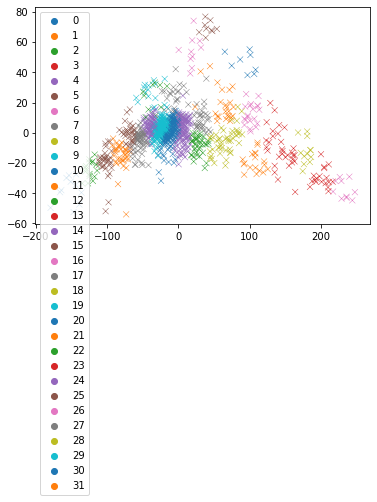

In [7]:
sns.scatterplot(x=C[:, 0], y=C[:, 1], hue=clusters, palette="tab10", marker='x')
plt.show()

In [8]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:3]), 3))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [33]:
xcut=x_train[:200,:]
xcut.shape

(200, 1024, 3)

In [34]:
list_clusters=[]
for i in range (len(xcut)):
    kmeans = KMeans(n_clusters=34) #sqrt(n)=K
    list_clusters+= [kmeans.fit_predict(xcut[i])]

In [50]:
def same_clusters(list_clusters,k):
    x=np.array(list_clusters).shape
    a=0
    for i in range (x[0]):
        all_clusters=np.arange(k)
        used_clusters=[]
        for j in range (x[1]):
            if list_clusters[i][j] not in used_clusters:
                a=list_clusters[i][j]
                used_clusters.append(all_clusters[0])
                for k in range(x[1]):
                    if list_clusters[i][k]==a:
                        list_clusters[i][k]=all_clusters[0]
                    elif list_clusters[i][k]==all_clusters[0]:
                        list_clusters[i][k]=a
                all_clusters=np.delete(all_clusters,0)
    return list_clusters
    

In [35]:
this_is_the_end=np.array(same_clusters(list_clusters,34))

In [41]:
#Agg clustering
ac = AgglomerativeClustering(n_clusters=10)
clusters_ac = ac.fit_predict(this_is_the_end)

In [42]:
#Kmean
kmeans = KMeans(n_clusters=10) #sqrt(n)=K
clusters_kmeans= kmeans.fit_predict(this_is_the_end)

In [44]:
test=np.array(same_clusters([clusters_ac, clusters_kmeans],10))

In [49]:
test

array([[0, 1, 2, 0, 3, 4, 0, 5, 1, 1, 1, 6, 2, 3, 1, 1, 1, 7, 1, 7, 5, 2,
        0, 0, 0, 7, 6, 8, 3, 7, 8, 2, 0, 7, 3, 4, 9, 4, 6, 0, 6, 0, 5, 1,
        9, 2, 7, 8, 2, 8, 3, 4, 4, 0, 8, 5, 1, 0, 8, 7, 0, 1, 2, 6, 5, 9,
        4, 2, 4, 2, 7, 9, 5, 9, 5, 0, 4, 1, 0, 8, 1, 5, 3, 6, 1, 3, 2, 4,
        5, 1, 0, 7, 3, 2, 1, 5, 0, 1, 1, 3, 2, 0, 1, 8, 8, 8, 3, 7, 3, 3,
        4, 3, 6, 4, 0, 3, 6, 6, 2, 2, 8, 6, 2, 8, 6, 7, 2, 1, 1, 2, 1, 3,
        8, 0, 8, 4, 0, 2, 0, 2, 4, 6, 4, 5, 4, 3, 9, 6, 1, 2, 9, 5, 4, 5,
        1, 1, 0, 4, 6, 6, 3, 2, 2, 0, 9, 2, 5, 6, 5, 6, 6, 1, 4, 5, 7, 2,
        6, 7, 5, 6, 2, 7, 2, 1, 7, 2, 7, 7, 2, 6, 3, 6, 3, 3, 8, 4, 3, 7,
        8, 2],
       [0, 1, 2, 0, 1, 3, 0, 0, 2, 3, 1, 3, 2, 4, 5, 6, 2, 0, 1, 0, 1, 2,
        0, 0, 0, 7, 7, 8, 9, 0, 8, 2, 7, 7, 0, 3, 7, 3, 7, 0, 7, 0, 1, 1,
        6, 6, 0, 8, 2, 8, 9, 3, 3, 0, 4, 6, 1, 0, 8, 1, 0, 6, 2, 9, 0, 7,
        3, 2, 3, 2, 5, 6, 0, 6, 0, 0, 3, 2, 0, 8, 1, 6, 0, 3, 5, 4, 2, 3,
        0, 3, 5, 1, 5, 